In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tqdm
import numpy
import torch
import torchvision
import torchvision.transforms.v2

transform = torchvision.transforms.v2.Compose([
    torchvision.transforms.v2.ToImage(),
    torchvision.transforms.v2.ToDtype(torch.float32, scale = True)
])

train = torchvision.datasets.CIFAR10('cifar-10', transform = transform, train = True, download = False)
test = torchvision.datasets.CIFAR10('cifar-10', transform = transform, train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]).transpose((1, 2, 0)) for item in tqdm.tqdm(train) ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]).transpose((1, 2, 0)) for item in tqdm.tqdm(test) ])
test_labels = numpy.array([ item[1] for item in test ])

train_images.shape, test_images.shape

100%|██████████| 10000/10000 [00:01<00:00, 9451.31it/s]


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
train_features = numpy.hstack([
    numpy.load(f"E:/{id}/{channel}/{split}/train.npy")
    for id in [ "4" ]
    for split in [ "None" ]
    for channel in [ "red", "green", "blue", "inv_red", "inv_green", "inv_blue", "gray", "inv_gray", "saturation", "value", "inv_saturation", "inv_value" ]
])

test_features = numpy.hstack([
    numpy.load(f"E:/{id}/{channel}/{split}/test.npy")
    for id in [ "4" ]
    for split in [ "None" ]
    for channel in [ "red", "green", "blue", "inv_red", "inv_green", "inv_blue", "gray", "inv_gray", "saturation", "value", "inv_saturation", "inv_value" ]
])

train_features.shape, test_features.shape

((50000, 21000), (10000, 21000))

In [4]:
import sklearn.preprocessing

selected_standard_scaler = sklearn.preprocessing.StandardScaler()
train_features = selected_standard_scaler.fit_transform(train_features)
test_features = selected_standard_scaler.transform(test_features)

In [ ]:
import cvtda.utils

duplicates_remover = cvtda.utils.DuplicateFeaturesRemover()
train_features = duplicates_remover.fit_transform(train_features)
test_features = duplicates_remover.transform(test_features)

train_features.shape, test_features.shape

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.3632, 'TOP-2 Accuracy': 0.5584, 'TOP-3 Accuracy': 0.6727, 'TOP-4 Accuracy': 0.7603, 'TOP-5 Accuracy': 0.8309, 'TOP-6 Accuracy': 0.8824, 'TOP-7 Accuracy': 0.9265, 'TOP-8 Accuracy': 0.9611, 'TOP-9 Accuracy': 0.9834, 'AUC-ROC': 0.7969157444444444, 'Precision': 0.3660388914393196, 'Recall': 0.36319999999999997, 'F1-score': 0.3513766219105457}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.4529, 'TOP-2 Accuracy': 0.64, 'TOP-3 Accuracy': 0.742, 'TOP-4 Accuracy': 0.8175, 'TOP-5 Accuracy': 0.8744, 'TOP-6 Accuracy': 0.9123, 'TOP-7 Accuracy': 0.9439, 'TOP-8 Accuracy': 0.9663, 'TOP-9 Accuracy': 0.9882, 'AUC-ROC': 0.8406219000000001, 'Precision': 0.44501482660759023, 'Recall': 0.45289999999999997, 'F1-score': 0.44552751129649637}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000017133532A70>
Input to 

100%|██████████| 25/25 [01:12<00:00,  2.91s/it, loss=9.41e+4, val_acc=0.58] 


{'classifier': 'NNClassifier', 'Accuracy': 0.58, 'TOP-2 Accuracy': 0.7632, 'TOP-3 Accuracy': 0.8486, 'TOP-4 Accuracy': 0.8996, 'TOP-5 Accuracy': 0.93, 'TOP-6 Accuracy': 0.9514, 'TOP-7 Accuracy': 0.9703, 'TOP-8 Accuracy': 0.9826, 'TOP-9 Accuracy': 0.9916, 'AUC-ROC': 0.8927333055555556, 'Precision': 0.57547172304969, 'Recall': 0.58, 'F1-score': 0.5763346681351855}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.4672, 'TOP-2 Accuracy': 0.6718, 'TOP-3 Accuracy': 0.7744, 'TOP-4 Accuracy': 0.8451, 'TOP-5 Accuracy': 0.8948, 'TOP-6 Accuracy': 0.9315, 'TOP-7 Accuracy': 0.9589, 'TOP-8 Accuracy': 0.9801, 'TOP-9 Accuracy': 0.9925, 'AUC-ROC': 0.8595956666666668, 'Precision': 0.4627289689382855, 'Recall': 0.46720000000000006, 'F1-score': 0.4620756390050954}
Fitting <catboost.core.CatBoostClassifier object at 0x0000017133532B30>
Learning rate set to 0.30928

d:\Programs\Programming\Python\lib\site-packages\xgboost\core.py:158: UserWarning: [15:35:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


{'classifier': 'XGBClassifier', 'Accuracy': 0.5108, 'TOP-2 Accuracy': 0.7041, 'TOP-3 Accuracy': 0.8046, 'TOP-4 Accuracy': 0.8684, 'TOP-5 Accuracy': 0.9113, 'TOP-6 Accuracy': 0.9455, 'TOP-7 Accuracy': 0.9676, 'TOP-8 Accuracy': 0.9842, 'TOP-9 Accuracy': 0.9937, 'AUC-ROC': 0.8790961944444443, 'Precision': 0.5062514235955635, 'Recall': 0.5107999999999999, 'F1-score': 0.5068434818002212}


,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3632,0.5584,0.6727,0.7603,0.8309,0.8824,0.9265,0.9611,0.9834,0.796916,0.366039,0.3632,0.351377
1,RandomForestClassifier,0.4529,0.6400,0.7420,0.8175,0.8744,0.9123,0.9439,0.9663,0.9882,0.840622,0.445015,0.4529,0.445528
2,NNClassifier,0.5800,0.7632,0.8486,0.8996,0.9300,0.9514,0.9703,0.9826,0.9916,0.892733,0.575472,0.5800,0.576335
3,HistGradientBoostingClassifier,0.4672,0.6718,0.7744,0.8451,0.8948,0.9315,0.9589,0.9801,0.9925,0.859596,0.462729,0.4672,0.462076
4,CatBoostClassifier,0.5744,0.7688,0.8583,0.9127,0.9455,0.9688,0.9825,0.9917,0.9973,0.913489,0.571305,0.5744,0.572357
5,XGBClassifier,0.5108,0.7041,0.8046,0.8684,0.9113,0.9455,0.9676,0.9842,0.9937,0.879096,0.506251,0.5108,0.506843


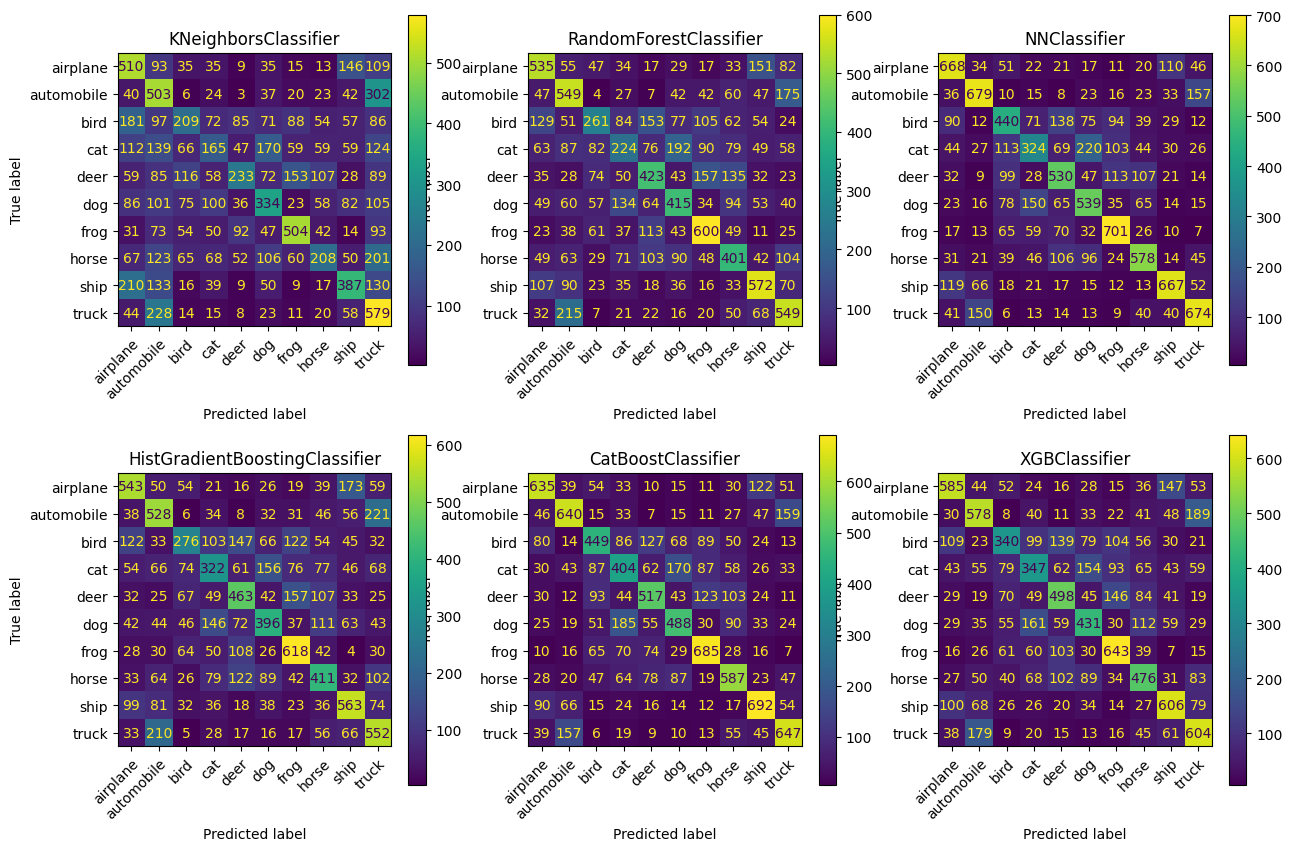

In [5]:
import cvtda.classification
import matplotlib.pyplot as plt

display(cvtda.classification.classify(train_features, train_labels, test_features, test_labels, label_names = test.classes))

for ax in plt.gcf().axes:
    ax.set_xticks(ax.get_xticks(), labels = ax.get_xticklabels(), rotation = 45, ha = "right", rotation_mode = "anchor")
plt.savefig("confusion_matrix.svg")

In [10]:
cb = cvtda.classification.NNClassifier(
    random_state = 42,
    device = 'cuda',
    batch_size = 128,
    learning_rate = 1e-4,
    n_epochs = 25
).fit(train_features, train_labels, test_features, test_labels)

Input to LazyLinear: 21000
Parameters: 5420778


100%|██████████| 25/25 [01:14<00:00,  2.99s/it, loss=9.41e+4, val_acc=0.58] 


In [11]:
train_pred = numpy.argmax(cb.predict_proba(train_features), axis = 1)
test_pred = numpy.argmax(cb.predict_proba(test_features), axis = 1)

import sklearn.metrics

print(sklearn.metrics.accuracy_score(train_pred, train_labels))
print(sklearn.metrics.accuracy_score(test_pred, test_labels))

0.65552
0.58


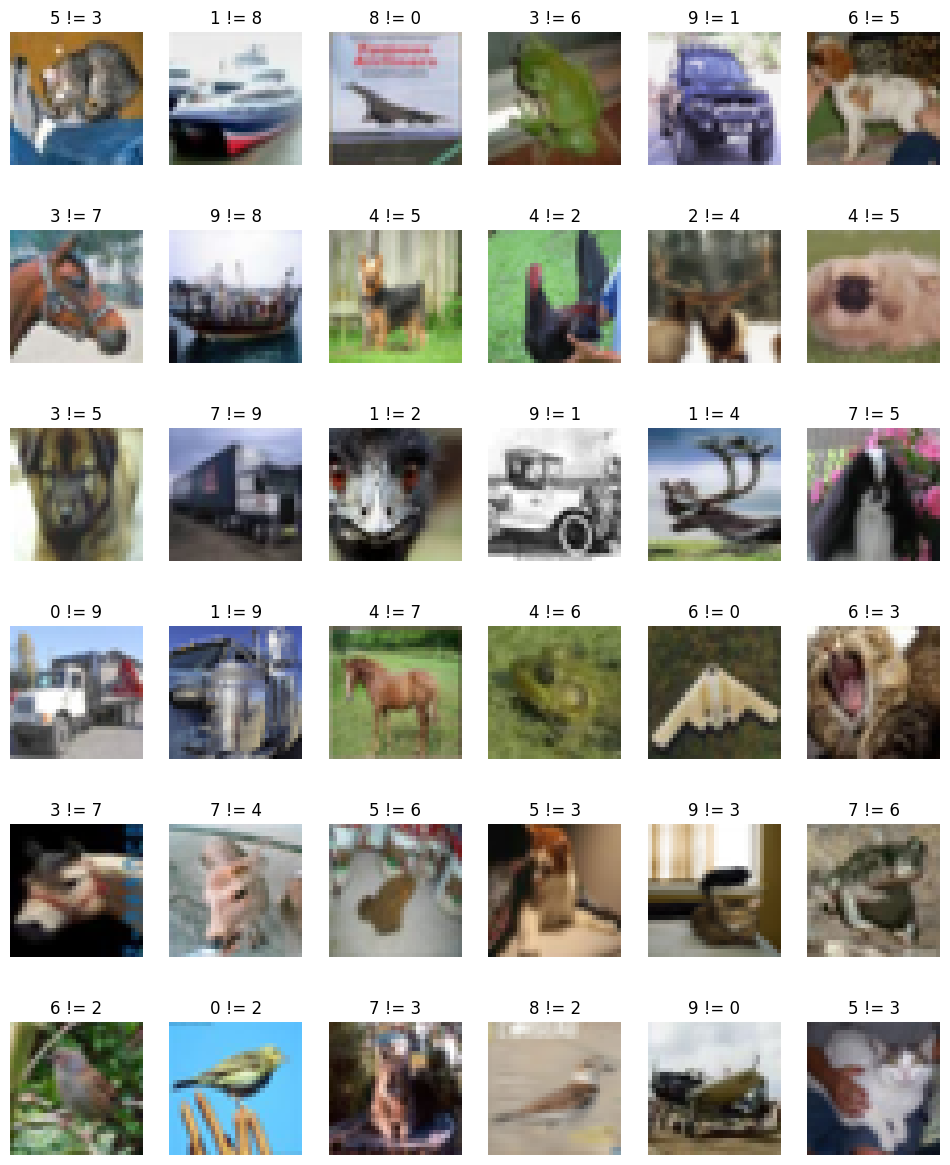

In [13]:
cou = 0
fig, axes = plt.subplots(6, 6, figsize = (12, 15))
for i in range(len(test_pred)):
    if test_pred[i] != test_labels[i]:
        axes.flat[cou].set_title(f"{test_pred[i]} != {test_labels[i]}")
        axes.flat[cou].imshow(test_images[i], cmap = "gray")
        axes.flat[cou].axis('off')
        cou += 1
    if cou == 36:
        break

plt.savefig("preds.svg")

Fitting the information value feature selector


information values: 100%|██████████| 10500/10500 [07:26<00:00, 23.49it/s]

Fitting complete


<Axes: >

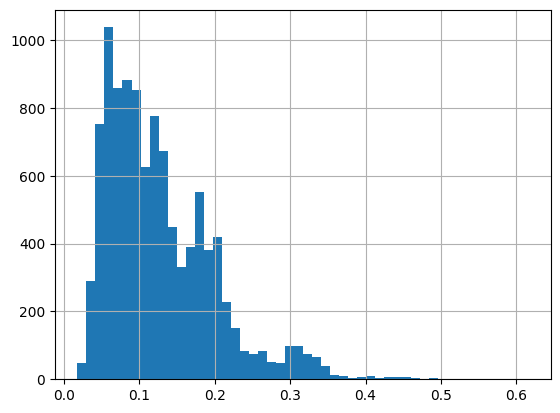

In [8]:
import cvtda.classification

feature_selector = cvtda.classification.InformationValueFeatureSelector(threshold = 0.1, bins = 50)
feature_selector.fit(train_features, train_labels)
feature_selector.hist()

In [9]:
train_features = feature_selector.transform(train_features)
test_features = feature_selector.transform(test_features)

train_features.shape, test_features.shape

((50000, 5839), (10000, 5839))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.3526, 'TOP-2 Accuracy': 0.5409, 'TOP-3 Accuracy': 0.6603, 'TOP-4 Accuracy': 0.7522, 'TOP-5 Accuracy': 0.8207, 'TOP-6 Accuracy': 0.8736, 'TOP-7 Accuracy': 0.9184, 'TOP-8 Accuracy': 0.9542, 'TOP-9 Accuracy': 0.9813, 'AUC-ROC': 0.7857851055555555, 'Precision': 0.34929424343207655, 'Recall': 0.35259999999999997, 'F1-score': 0.34043849353995403}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.4471, 'TOP-2 Accuracy': 0.634, 'TOP-3 Accuracy': 0.7443, 'TOP-4 Accuracy': 0.8119, 'TOP-5 Accuracy': 0.8668, 'TOP-6 Accuracy': 0.9106, 'TOP-7 Accuracy': 0.9448, 'TOP-8 Accuracy': 0.9715, 'TOP-9 Accuracy': 0.9891, 'AUC-ROC': 0.8375765388888889, 'Precision': 0.44095213676105904, 'Recall': 0.4471, 'F1-score': 0.44135963196253325}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000026C1AC88F40>
Input to LazyLinea

100%|██████████| 25/25 [02:13<00:00,  5.36s/it, loss=9.73e+4, val_acc=0.544]


{'classifier': 'NNClassifier', 'Accuracy': 0.5442, 'TOP-2 Accuracy': 0.7316, 'TOP-3 Accuracy': 0.8226, 'TOP-4 Accuracy': 0.8818, 'TOP-5 Accuracy': 0.9211, 'TOP-6 Accuracy': 0.9475, 'TOP-7 Accuracy': 0.968, 'TOP-8 Accuracy': 0.9819, 'TOP-9 Accuracy': 0.9916, 'AUC-ROC': 0.8772025777777779, 'Precision': 0.5390972675806396, 'Recall': 0.5442, 'F1-score': 0.5403539671598551}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.4577, 'TOP-2 Accuracy': 0.6548, 'TOP-3 Accuracy': 0.7603, 'TOP-4 Accuracy': 0.834, 'TOP-5 Accuracy': 0.8863, 'TOP-6 Accuracy': 0.9264, 'TOP-7 Accuracy': 0.9546, 'TOP-8 Accuracy': 0.9769, 'TOP-9 Accuracy': 0.9918, 'AUC-ROC': 0.8513009777777776, 'Precision': 0.45303968437398767, 'Recall': 0.4576999999999999, 'F1-score': 0.45203461656804506}
Fitting <catboost.core.CatBoostClassifier object at 0x0000026C1AC89000>
Learning rate set to 

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3526,0.5409,0.6603,0.7522,0.8207,0.8736,0.9184,0.9542,0.9813,0.785785,0.349294,0.3526,0.340438
1,RandomForestClassifier,0.4471,0.6340,0.7443,0.8119,0.8668,0.9106,0.9448,0.9715,0.9891,0.837577,0.440952,0.4471,0.441360
2,NNClassifier,0.5442,0.7316,0.8226,0.8818,0.9211,0.9475,0.9680,0.9819,0.9916,0.877203,0.539097,0.5442,0.540354
3,HistGradientBoostingClassifier,0.4577,0.6548,0.7603,0.8340,0.8863,0.9264,0.9546,0.9769,0.9918,0.851301,0.453040,0.4577,0.452035
4,CatBoostClassifier,0.5590,0.7492,0.8416,0.9000,0.9378,0.9630,0.9793,0.9895,0.9963,0.903935,0.554977,0.5590,0.556307
5,XGBClassifier,0.4935,0.6837,0.7900,0.8579,0.9053,0.9415,0.9643,0.9834,0.9951,0.871096,0.488678,0.4935,0.489105


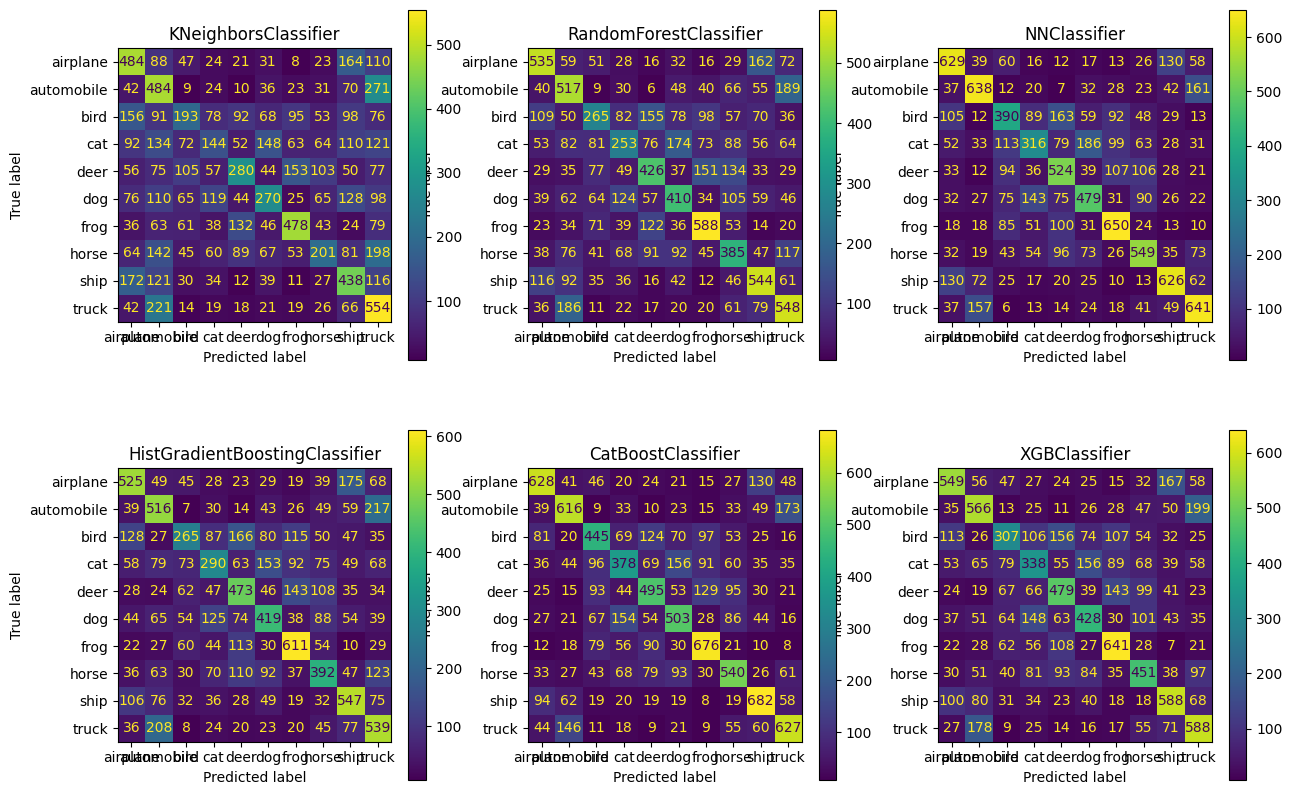

In [12]:
cvtda.classification.classify(train_features, train_labels, test_features, test_labels, label_names = test.classes)

Fitting the correlations feature selector
Fitting complete


(array([  2.,   2.,   1.,   2.,   1.,   0.,   1.,   1.,   4.,   2.,   3.,
          4.,   0.,   4.,   1.,   4.,   4.,   6.,   2.,   9.,  22.,  27.,
         52., 144., 171., 283., 314., 620., 950., 610., 271., 217., 199.,
        176., 209., 179., 230., 268., 241., 226., 152., 129.,  55.,   8.,
          5.,  18.,   2.,   2.,   1.,   5.]),
 array([-0.14945696, -0.1424025 , -0.13534804, -0.12829357, -0.12123911,
        -0.11418464, -0.10713018, -0.10007572, -0.09302125, -0.08596679,
        -0.07891232, -0.07185786, -0.0648034 , -0.05774893, -0.05069447,
        -0.04364001, -0.03658554, -0.02953108, -0.02247661, -0.01542215,
        -0.00836769, -0.00131322,  0.00574124,  0.01279571,  0.01985017,
         0.02690463,  0.0339591 ,  0.04101356,  0.04806802,  0.05512249,
         0.06217695,  0.06923142,  0.07628588,  0.08334034,  0.09039481,
         0.09744927,  0.10450374,  0.1115582 ,  0.11861266,  0.12566713,
         0.13272159,  0.13977606,  0.14683052,  0.15388498,  0.16093945,
 

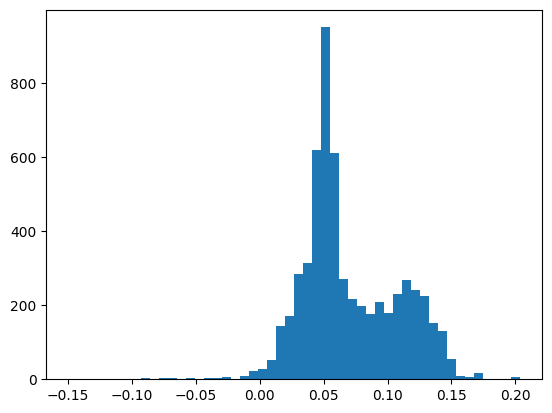

In [13]:
import cvtda.classification

correlation_selector = cvtda.classification.CorrelationSelector(threshold = 0.05)
correlation_selector.fit(train_features, train_labels)
correlation_selector.hist()

In [14]:
train_features = correlation_selector.transform(train_features)
test_features = correlation_selector.transform(test_features)

train_features.shape, test_features.shape

((50000, 3823), (10000, 3823))

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.3477, 'TOP-2 Accuracy': 0.5378, 'TOP-3 Accuracy': 0.6633, 'TOP-4 Accuracy': 0.7526, 'TOP-5 Accuracy': 0.8199, 'TOP-6 Accuracy': 0.8737, 'TOP-7 Accuracy': 0.9148, 'TOP-8 Accuracy': 0.9506, 'TOP-9 Accuracy': 0.9818, 'AUC-ROC': 0.7803602, 'Precision': 0.3456382889046159, 'Recall': 0.3477, 'F1-score': 0.33808660565509663}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.4292, 'TOP-2 Accuracy': 0.6171, 'TOP-3 Accuracy': 0.728, 'TOP-4 Accuracy': 0.8033, 'TOP-5 Accuracy': 0.8616, 'TOP-6 Accuracy': 0.9065, 'TOP-7 Accuracy': 0.9402, 'TOP-8 Accuracy': 0.967, 'TOP-9 Accuracy': 0.9875, 'AUC-ROC': 0.8281707611111112, 'Precision': 0.4213347998351565, 'Recall': 0.42919999999999997, 'F1-score': 0.422359361515532}
Fitting <cvtda.classification.nn_classifier.NNClassifier object at 0x0000026C1A4A0520>
Input to LazyLinear: 3823
Parame

100%|██████████| 25/25 [01:35<00:00,  3.81s/it, loss=9.9e+4, val_acc=0.521] 


{'classifier': 'NNClassifier', 'Accuracy': 0.521, 'TOP-2 Accuracy': 0.7099, 'TOP-3 Accuracy': 0.8092, 'TOP-4 Accuracy': 0.8698, 'TOP-5 Accuracy': 0.9109, 'TOP-6 Accuracy': 0.9401, 'TOP-7 Accuracy': 0.9634, 'TOP-8 Accuracy': 0.981, 'TOP-9 Accuracy': 0.9926, 'AUC-ROC': 0.8691271444444444, 'Precision': 0.5113468395144838, 'Recall': 0.521, 'F1-score': 0.5120963306858196}
Fitting HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42)
{'classifier': 'HistGradientBoostingClassifier', 'Accuracy': 0.442, 'TOP-2 Accuracy': 0.6392, 'TOP-3 Accuracy': 0.7482, 'TOP-4 Accuracy': 0.8256, 'TOP-5 Accuracy': 0.8806, 'TOP-6 Accuracy': 0.9226, 'TOP-7 Accuracy': 0.9504, 'TOP-8 Accuracy': 0.9751, 'TOP-9 Accuracy': 0.991, 'AUC-ROC': 0.8432700555555552, 'Precision': 0.43502611783248835, 'Recall': 0.442, 'F1-score': 0.43468373267481686}
Fitting <catboost.core.CatBoostClassifier object at 0x0000026C1A4A3730>
Learning rate set to 0.309284
0:	lear

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.3477,0.5378,0.6633,0.7526,0.8199,0.8737,0.9148,0.9506,0.9818,0.780360,0.345638,0.3477,0.338087
1,RandomForestClassifier,0.4292,0.6171,0.7280,0.8033,0.8616,0.9065,0.9402,0.9670,0.9875,0.828171,0.421335,0.4292,0.422359
2,NNClassifier,0.5210,0.7099,0.8092,0.8698,0.9109,0.9401,0.9634,0.9810,0.9926,0.869127,0.511347,0.5210,0.512096
3,HistGradientBoostingClassifier,0.4420,0.6392,0.7482,0.8256,0.8806,0.9226,0.9504,0.9751,0.9910,0.843270,0.435026,0.4420,0.434684
4,CatBoostClassifier,0.5387,0.7369,0.8356,0.8962,0.9360,0.9614,0.9773,0.9888,0.9969,0.899261,0.534292,0.5387,0.535786
5,XGBClassifier,0.4809,0.6731,0.7816,0.8560,0.9017,0.9373,0.9627,0.9816,0.9941,0.865396,0.475267,0.4809,0.475951


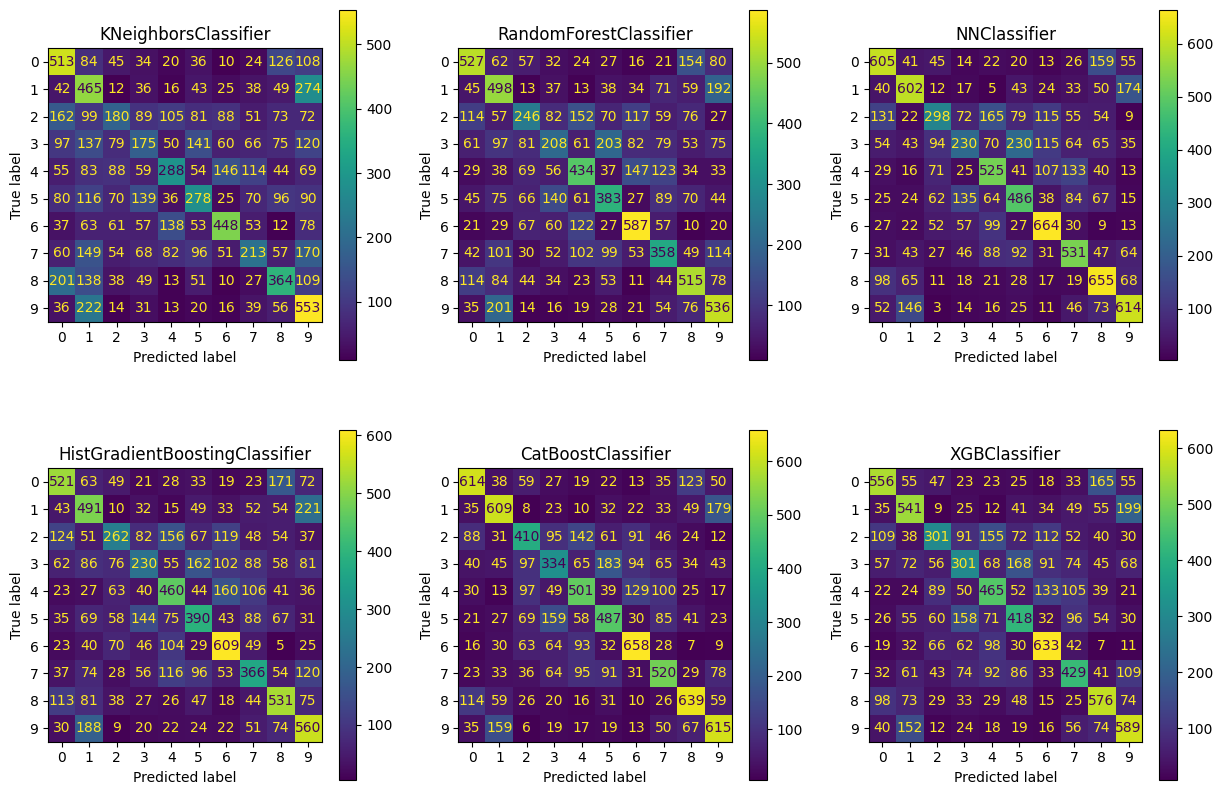

In [15]:
cvtda.classification.classify(train_features, train_labels, test_features, test_labels)